# Reducción de dimensiones
Como se comentó en la presentación la reducción de dimensiones tiene diferentes finalidades, pero de forma general este consiste en reducir la cantidad de variables a la hora de analizar.

In [ ]:
#importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# leer el archivo de datos datos_perdidos.txt
datos = pd.read_csv('/content/EURUSD TENDENCIAL.csv')
# mostrar los primeros 5 registros
datos.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,trend,trend_index
0,0,2022-02-28 14:00:00,1.11992,1.12083,1.11915,1.11929,4399,0,0,0,0.0
1,1,2022-02-28 15:00:00,1.11929,1.12169,1.11794,1.12124,5620,0,0,0,1.0
2,2,2022-02-28 16:00:00,1.12129,1.12298,1.12049,1.12222,5052,0,0,0,2.0
3,3,2022-02-28 17:00:00,1.12219,1.12367,1.12009,1.12318,6613,0,0,0,3.0
4,4,2022-02-28 18:00:00,1.12316,1.12466,1.12168,1.12246,6232,0,0,0,4.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   time         10000 non-null  object 
 2   open         10000 non-null  float64
 3   high         10000 non-null  float64
 4   low          10000 non-null  float64
 5   close        10000 non-null  float64
 6   tick_volume  10000 non-null  int64  
 7   spread       10000 non-null  int64  
 8   real_volume  10000 non-null  int64  
 9   trend        10000 non-null  int64  
 10  trend_index  10000 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 859.5+ KB


In [ ]:
datos.value_counts()

Unnamed: 0  time                 open     high     low      close    tick_volume  spread  real_volume  trend  trend_index
0           2022-02-28 14:00:00  1.11992  1.12083  1.11915  1.11929  4399         0       0            0      0.0            1
6670        2023-03-24 12:00:00  1.07800  1.07907  1.07215  1.07257  5702         0       0            1      0.0            1
6663        2023-03-24 05:00:00  1.08251  1.08283  1.08198  1.08204  2820         0       0            0      19.0           1
6664        2023-03-24 06:00:00  1.08206  1.08288  1.08173  1.08288  1984         0       0            0      20.0           1
6665        2023-03-24 07:00:00  1.08288  1.08343  1.08233  1.08343  1950         0       0            0      21.0           1
                                                                                                                            ..
3333        2022-09-09 11:00:00  1.00964  1.01133  1.00944  1.01069  5057         0       0            1      45.0  

In [ ]:
#extraer variables numericas
datos_numericos = datos.select_dtypes(include=['float64'])

In [ ]:
datos_numericos.head()

,open,high,low,close,trend_index
0,1.11992,1.12083,1.11915,1.11929,0.0
1,1.11929,1.12169,1.11794,1.12124,1.0
2,1.12129,1.12298,1.12049,1.12222,2.0
3,1.12219,1.12367,1.12009,1.12318,3.0
4,1.12316,1.12466,1.12168,1.12246,4.0


In [ ]:
#vamos a normalizar los datos_numericos
scaler = StandardScaler()
datos_numericos_normalizados = scaler.fit_transform(datos_numericos)

In [ ]:
#vamos a ajustar un modelo PCA
pca = PCA(n_components=2)
pca.fit(datos_numericos_normalizados)
datos_pca = pca.transform(datos_numericos_normalizados)

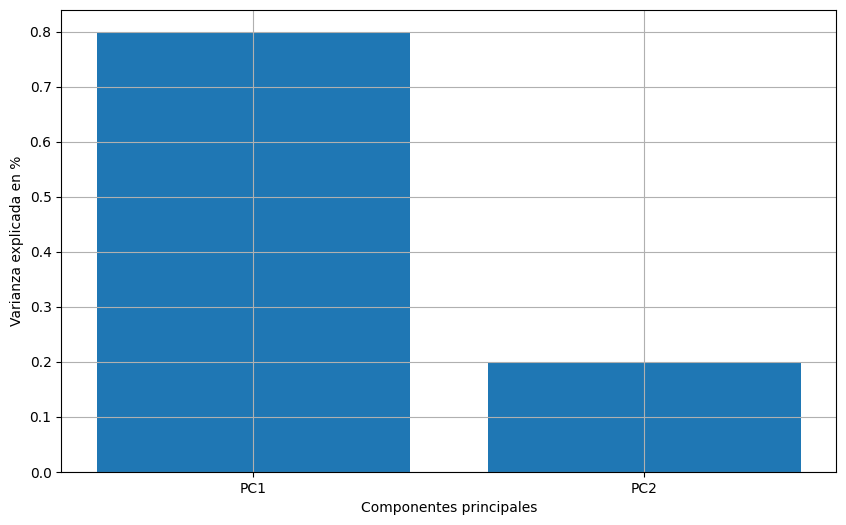

In [ ]:
# generar una grafica de la varianza por componente
plt.figure(figsize=(10, 6))
plt.bar(range(2), pca.explained_variance_ratio_)
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada en %')
plt.xticks(range(2), ['PC1', 'PC2'])
plt.grid()
plt.show()

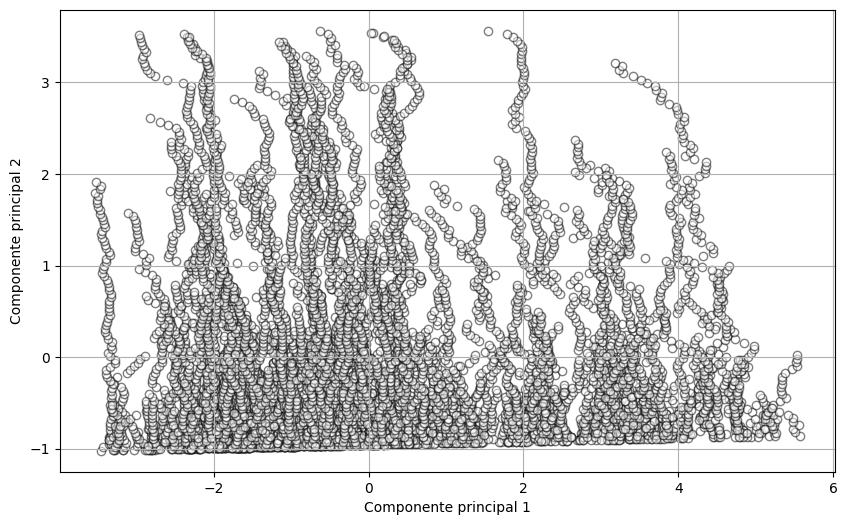

In [ ]:
# realizar un grafo biplot de datos pca
plt.figure(figsize=(10, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c='white', edgecolor='black', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

In [ ]:
# graficar el biplot con los vectores de carga
plt.figure(figsize=(10, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], c='white', edgecolor='black', alpha=0.5)
contador = 0
for i, j in zip(pca.components_[0], pca.components_[1]):
    plt.arrow(0, 0, i, j, color='red', head_width=0.05,label='vectores de carga')
    plt.annotate('{}'.format(datos_numericos.columns[contador]), xy=(i, j),fontsize=6)
    contador += 1
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

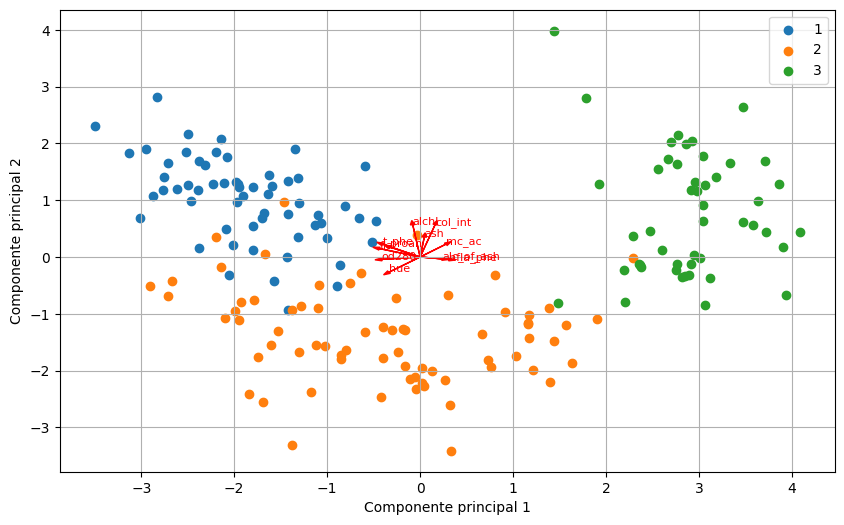

In [ ]:
# hacer un biplot con los vectores de carga y agrupando
# los datos por datos.Zona
plt.figure(figsize=(10, 6))
for i in datos.tipo.unique():
    plt.scatter(datos_pca[datos.tipo == i, 0], datos_pca[datos.tipo == i, 1], label=i)
contador = 0
for i, j in zip(pca.components_[0], pca.components_[1]):
    plt.arrow(0, 0, i, j, color='red', head_width=0.05)
    plt.annotate('{}'.format(datos_numericos.columns[contador]), xy=(i, j), color='red', fontsize=8)
    contador += 1
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pca.components_[0]

array([-0.07969862,  0.27577294,  0.04499771,  0.23609862, -0.40076246,
       -0.43785652,  0.30984658, -0.32205885,  0.16152955, -0.33496731,
       -0.41167887])

In [ ]:
pca.components_[1]

array([ 0.56804022,  0.22428148,  0.35164162, -0.03374944,  0.22344298,
        0.14819731, -0.04276821,  0.17333568,  0.57030169, -0.26727751,
       -0.04233683])